# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [5]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X = iris.data
y = iris.target

載入 相關套件 並 執行 hierarchical clustering 實驗 ...
> https://ithelp.ithome.com.tw/articles/10187314

與 K-Means 演算法不同的地方在於不需要事先設定 k 值，Hierarchical Clustering 演算法每一次只將兩個觀測值歸為一類，然後在演算過程中得到 k = 1 一直到 k = n（觀測值個數）群的結果。

hc_ward accuracy = 0.893
hc_complete accuracy = 0.493
hc_average accuracy = 0.000


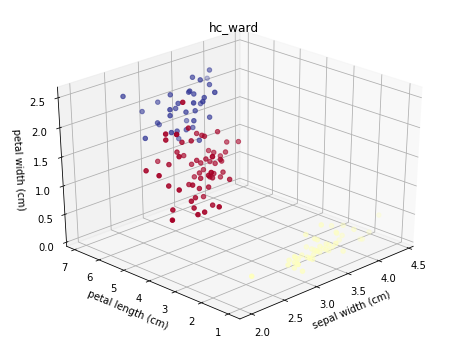

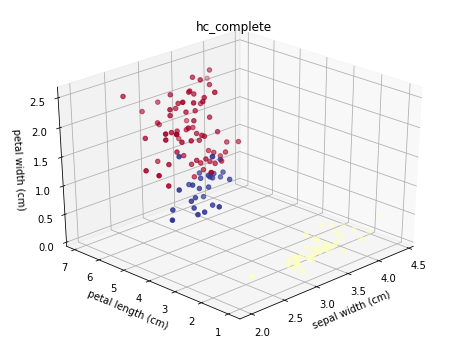

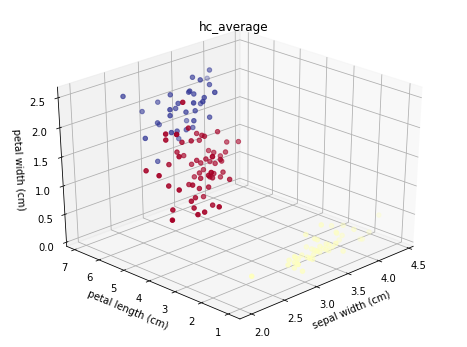

In [10]:
# Hierarchical Clustering 演算法
from sklearn.cluster import AgglomerativeClustering

estimators = [
    ('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
    ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
    ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

for name, est in estimators:
    est.fit(X)
    labels = est.labels_
    plot_cluster(X[:, 1:], est.labels_, iris.feature_names[1:])
    ax = plt.gca()
    ax.set_title(name)
    
    if name == 'hc_ward' or name == 'hc_complete':
        errors = sum(labels[:50] != 1) + sum(labels[50:100] != 0) + sum(labels[100:] !=2)
    else:
        errors = sum(labels[:50] != 0) + sum(labels[50:100] != 2) + sum(labels[100:] !=1)
    print("{} accuracy = {:.3f}".format(name, (150 - errors) / 150))

### Ground Truth

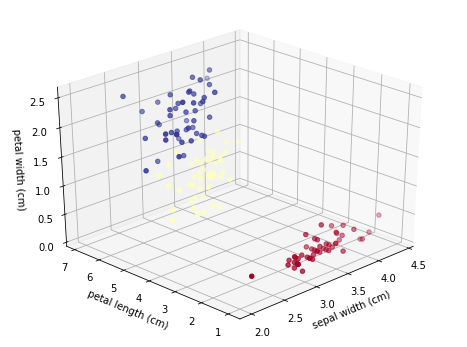

In [6]:
def plot_cluster(X, y, labels):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.view_init(elev=30, azim=225)
    
plot_cluster(X[:, 1:], y, iris.feature_names[1:])